In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class being(object):
    def __init__(self, name, pop):
        self.name = name
        self.pop = pop
        self.dpop = 0.0

    def change_pop(self, dt):
        self.pop += self.dpop*dt
    def die(self, u):
        p = self.get_pop()
        return u*p
        
    def info(self):
        print(self.name, self.pop, self)
    def get_pop(self):
        return self.pop
    def get_name(self):
        return self.name

In [3]:
class autotroph(being):
    def photosynthesis(self):
        p = a.get_pop()
        return p*(1.0-p)

In [4]:
class heterotroph(being):
    def g(self, n, p):
        return (2.0*n*p)/(n+p)
    def eat(self, other):
        n = other.get_pop()
        p = self.get_pop()
        dh = self.g(n,p)*p  
        return dh

In [5]:
def time_step(critters, dt):
    for critter in critters:
        critter.change_pop(dt)

In [6]:
a = autotroph('a', 0.5)

In [114]:
A = [10.0]
a = autotroph('a', A[0])
dt = 0.1
for t in range(200):
    a.dpop = a.photosynthesis()
    time_step([a], dt) 
    A.append(a.get_pop())
    

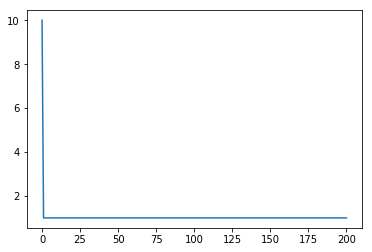

In [115]:
plt.plot(A)
plt.show()

In [133]:
grass_pop = [10.0]
cow_pop = [0.1]
wolf_pop = [0.01]
grass = autotroph('grass', grass_pop[0])
cow = heterotroph('cow', 0.1)
wolf = heterotroph('wolf', 0.01)

A = [10.0]
a = autotroph('a', A[0])

critters = [a, grass, cow, wolf]
grass.info()
cow.info()
wolf.info()


N = 20000
dt = 0.1
death_rate = 0.1
# grass_pop = np.zeros(N)
# cow_pop = np.zeros(N)
# wolf_pop = np.zeros(N)
for t in range(N):
    grass_photo = grass.photosynthesis()
    cow_eat = cow.eat(grass)
    wolf_eat = wolf.eat(cow)
    
    grass.dpop = grass_photo - cow_eat
    cow.dpop = 0.1*cow_eat - wolf_eat - cow.die(death_rate)
    wolf.dpop = 0.1*wolf_eat - wolf.die(death_rate)
    
    a.dpop = a.photosynthesis()
    
    time_step(critters, dt)
    
    
    grass_pop.append(grass.get_pop())
    cow_pop.append(cow.get_pop())
    wolf_pop.append(wolf.get_pop())
    
    A.append(a.get_pop())

print('')
grass.info()
cow.info()
wolf.info()

grass 10.0 <__main__.autotroph object at 0x11aa2b2b0>
cow 0.1 <__main__.heterotroph object at 0x11aa2b780>
wolf 0.01 <__main__.heterotroph object at 0x11aa2b7b8>

grass 0.8938278309848235 <__main__.autotroph object at 0x11aa2b2b0>
cow 6.134381151850057e-89 <__main__.heterotroph object at 0x11aa2b780>
wolf 5.152274472628301e-90 <__main__.heterotroph object at 0x11aa2b7b8>


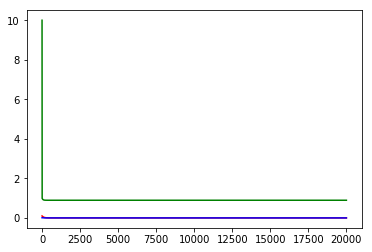

In [134]:
plt.plot(grass_pop, color='g')
plt.plot(cow_pop, color='r')
plt.plot(wolf_pop, color='b')
#plt.plot(A)
plt.show()

In [132]:
grass.info(), cow.info(), wolf.info()

grass 0.8963480936132187 <__main__.autotroph object at 0x1b6e2f978>
cow 0.015773772479187178 <__main__.heterotroph object at 0x1b6e2fb00>
wolf 0.0013615817743374626 <__main__.heterotroph object at 0x1b6e2f908>


(None, None, None)

In [411]:
1/99

0.010101010101010102